In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
sns.set()

In [2]:
raw_data=pd.read_csv("SGD\data.csv")
raw_data.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443


In [3]:
data=raw_data.copy(deep=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
data.shape

(398, 9)

In [6]:
missing_values = data.isnull().sum()
missing_values

origin                 0
cylinders              0
displacement           0
horsepower             0
weight                 0
acceleration           0
year                   0
name                   0
Kilometer_per_liter    0
dtype: int64

In [7]:
data.dtypes

origin                   int64
cylinders                int64
displacement           float64
horsepower              object
weight                   int64
acceleration           float64
year                     int64
name                    object
Kilometer_per_liter    float64
dtype: object

In [8]:
data.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [9]:
data = data[data.horsepower != "?"]

In [10]:
"?" in data.horsepower

False

In [11]:
data.shape

(392, 9)

In [12]:
data.horsepower = data.horsepower.astype("float")

In [13]:
data.dtypes

origin                   int64
cylinders                int64
displacement           float64
horsepower             float64
weight                   int64
acceleration           float64
year                     int64
name                    object
Kilometer_per_liter    float64
dtype: object

In [14]:
df = data.copy(deep=True)

In [15]:
df.origin = df.origin.astype("object")

In [16]:
df[["manufacturer","model"]]=df["name"].str.split(" ",n=1,expand=True)
df.drop("name", axis=1, inplace=True)
df.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter,manufacturer,model
0,1,8,307.0,130.0,3504,12.0,1970,7.652587,chevrolet,chevelle malibu
1,1,8,350.0,165.0,3693,11.5,1970,6.377156,buick,skylark 320
2,1,8,318.0,150.0,3436,11.0,1970,7.652587,plymouth,satellite
3,1,8,304.0,150.0,3433,12.0,1970,6.802299,amc,rebel sst
4,1,8,302.0,140.0,3449,10.5,1970,7.227443,ford,torino


In [17]:
print(sorted(df.manufacturer.unique()))

['amc', 'audi', 'bmw', 'buick', 'cadillac', 'capri', 'chevroelt', 'chevrolet', 'chevy', 'chrysler', 'datsun', 'dodge', 'fiat', 'ford', 'hi', 'honda', 'maxda', 'mazda', 'mercedes', 'mercedes-benz', 'mercury', 'nissan', 'oldsmobile', 'opel', 'peugeot', 'plymouth', 'pontiac', 'renault', 'saab', 'subaru', 'toyota', 'toyouta', 'triumph', 'vokswagen', 'volkswagen', 'volvo', 'vw']


In [18]:
errors = {
         "vokswagen":"volkswagen",
         "vw":"volkswagen",
         "toyouta":"toyota",
         "mercedes-benz":"mercedes",
         "chevroelt":"chevrolet",
         "chevy":"chevrolet",
         "maxda":"mazda"
         }

df.manufacturer = df.manufacturer.map(errors).fillna(df.manufacturer)

In [19]:
print(sorted(df.manufacturer.unique()))

['amc', 'audi', 'bmw', 'buick', 'cadillac', 'capri', 'chevrolet', 'chrysler', 'datsun', 'dodge', 'fiat', 'ford', 'hi', 'honda', 'mazda', 'mercedes', 'mercury', 'nissan', 'oldsmobile', 'opel', 'peugeot', 'plymouth', 'pontiac', 'renault', 'saab', 'subaru', 'toyota', 'triumph', 'volkswagen', 'volvo']


In [20]:
df.model.tail(10)

388    lebaron medallion
389            granada l
390            celica gt
391          charger 2.2
392               camaro
393           mustang gl
394               pickup
395              rampage
396               ranger
397                 s-10
Name: model, dtype: object

In [21]:
import re
def alphanumeric(x):
    return re.sub("[^A-Za-z0-9]","",(str(x)))

df["model"]=df.model.apply(lambda x: alphanumeric(x))

In [22]:
df.model.tail(10)

388    lebaronmedallion
389            granadal
390            celicagt
391           charger22
392              camaro
393           mustanggl
394              pickup
395             rampage
396              ranger
397                 s10
Name: model, dtype: object

In [23]:
df.shape

(392, 10)

In [24]:
print(len(df.model.unique()))

293


In [25]:
df.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter,manufacturer,model
0,1,8,307.0,130.0,3504,12.0,1970,7.652587,chevrolet,chevellemalibu
1,1,8,350.0,165.0,3693,11.5,1970,6.377156,buick,skylark320
2,1,8,318.0,150.0,3436,11.0,1970,7.652587,plymouth,satellite
3,1,8,304.0,150.0,3433,12.0,1970,6.802299,amc,rebelsst
4,1,8,302.0,140.0,3449,10.5,1970,7.227443,ford,torino


In [26]:
df.describe()

,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,5.471939,194.411990,104.469388,2977.584184,15.541327,1975.979592,9.967885
std,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,3.318250
min,3.000000,68.000000,46.000000,1613.000000,8.000000,1970.000000,3.826293
25%,4.000000,105.000000,75.000000,2225.250000,13.775000,1973.000000,7.227443
50%,4.000000,151.000000,93.500000,2803.500000,15.500000,1976.000000,9.672019
75%,8.000000,275.750000,126.000000,3614.750000,17.025000,1979.000000,12.329168
max,8.000000,455.000000,230.000000,5140.000000,24.800000,1982.000000,19.811697


In [27]:
df.describe(include="object")

,origin,manufacturer,model
count,392,392,392
unique,3,30,293
top,1,ford,rabbit
freq,245,48,5


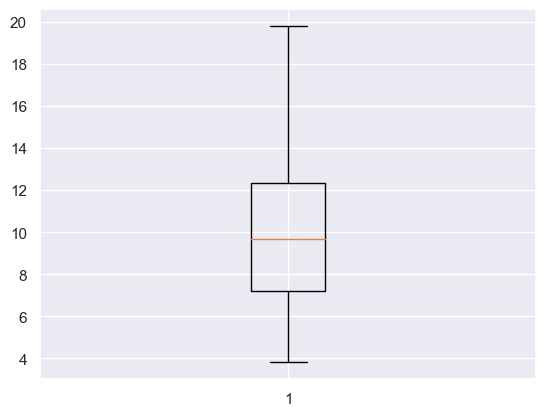

In [28]:
plt.boxplot(df.Kilometer_per_liter)
Q1=df.Kilometer_per_liter.quantile(0.25)
Q3=df.Kilometer_per_liter.quantile(0.75)
IQR=Q3-Q1
df = df[(df.Kilometer_per_liter >= Q1 - 1.5 * IQR) & (df.Kilometer_per_liter <= Q3 + 1.5 * IQR)]

In [29]:
df.shape

(392, 10)

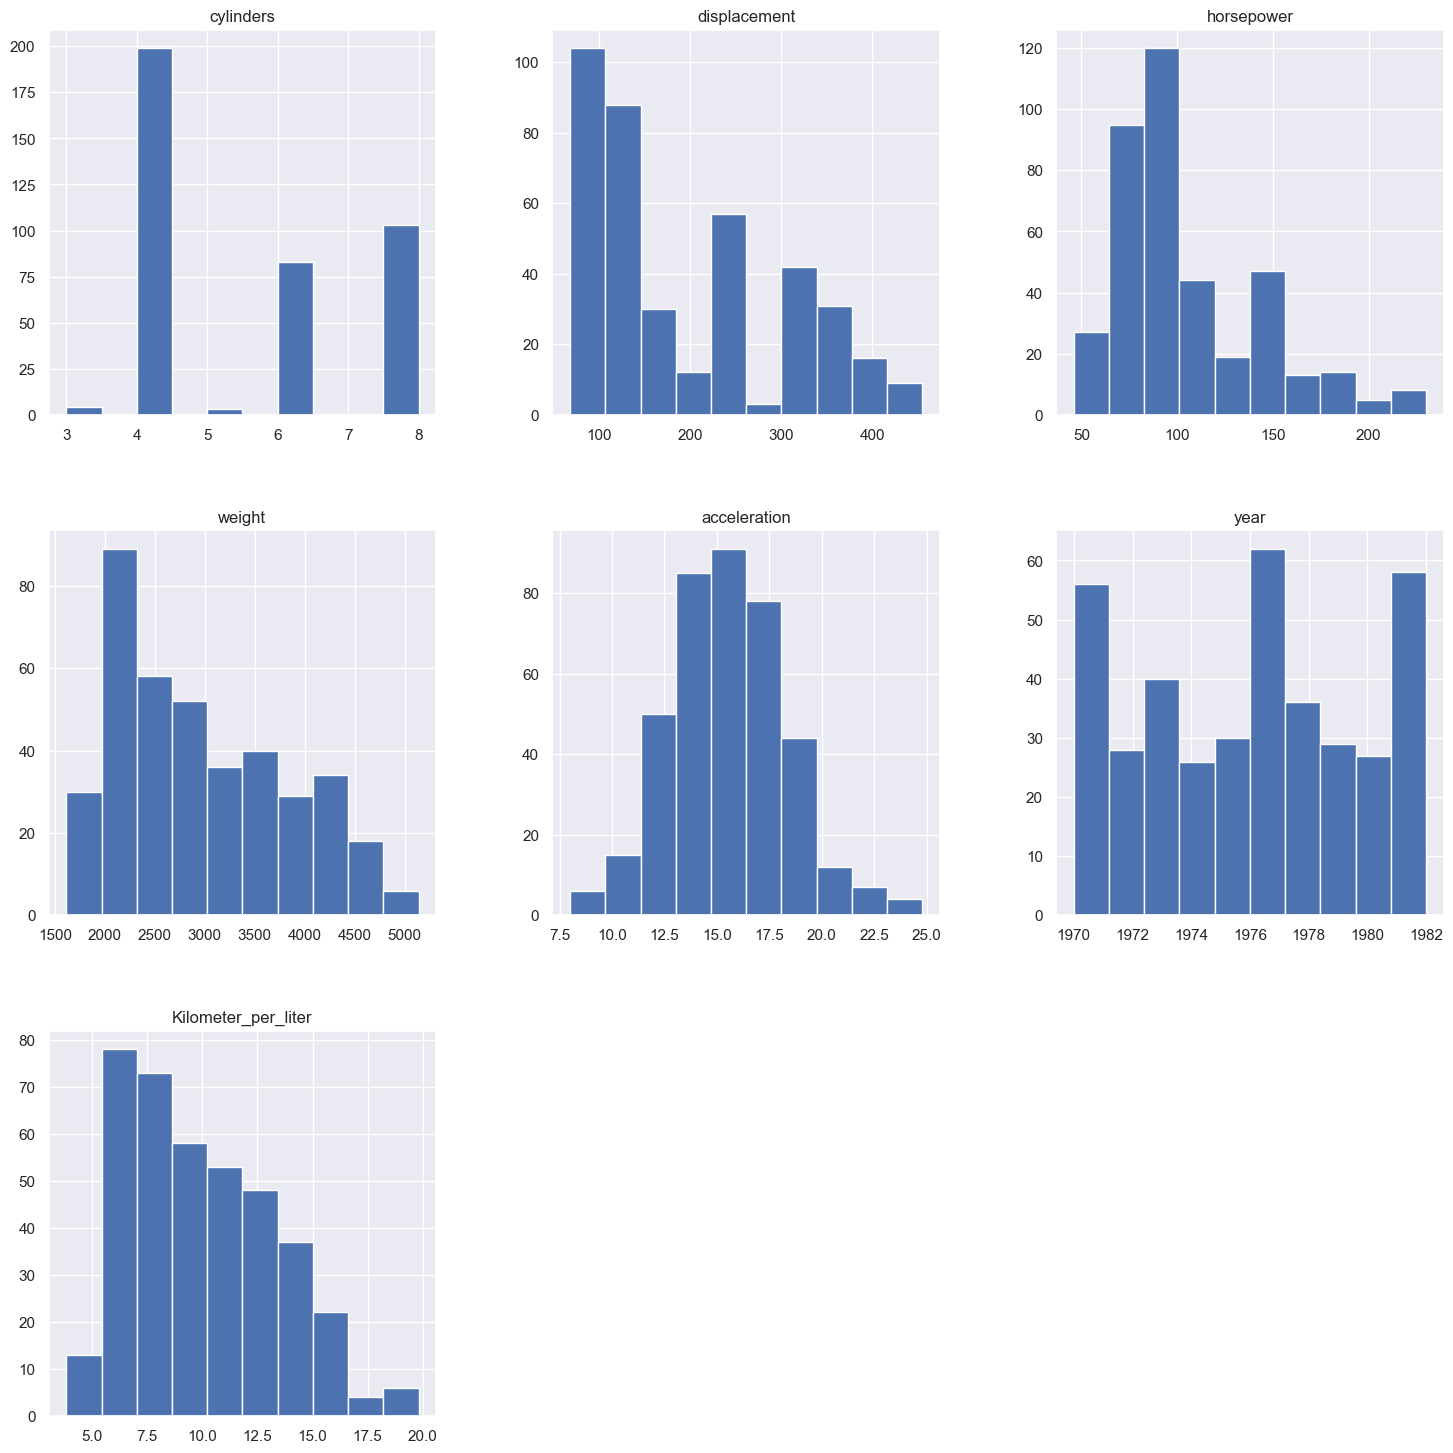

In [30]:
fig = df.hist(figsize=(18,18))

In [31]:
df.Kilometer_per_liter.describe()

count    392.000000
mean       9.967885
std        3.318250
min        3.826293
25%        7.227443
50%        9.672019
75%       12.329168
max       19.811697
Name: Kilometer_per_liter, dtype: float64

C:\Users\vaish\AppData\Local\Temp\ipykernel_19256\3372590458.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Kilometer_per_liter)


<Axes: xlabel='Kilometer_per_liter', ylabel='Density'>

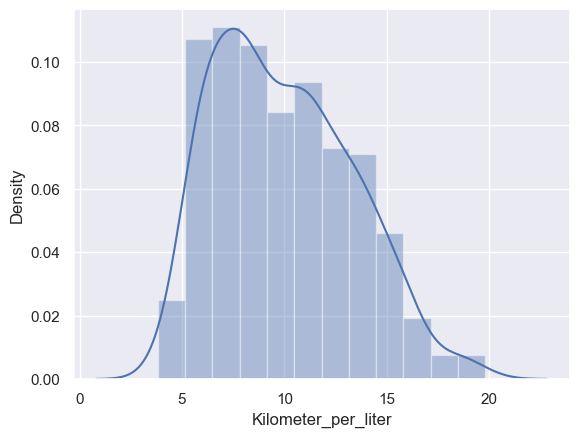

In [32]:
sns.distplot(df.Kilometer_per_liter)

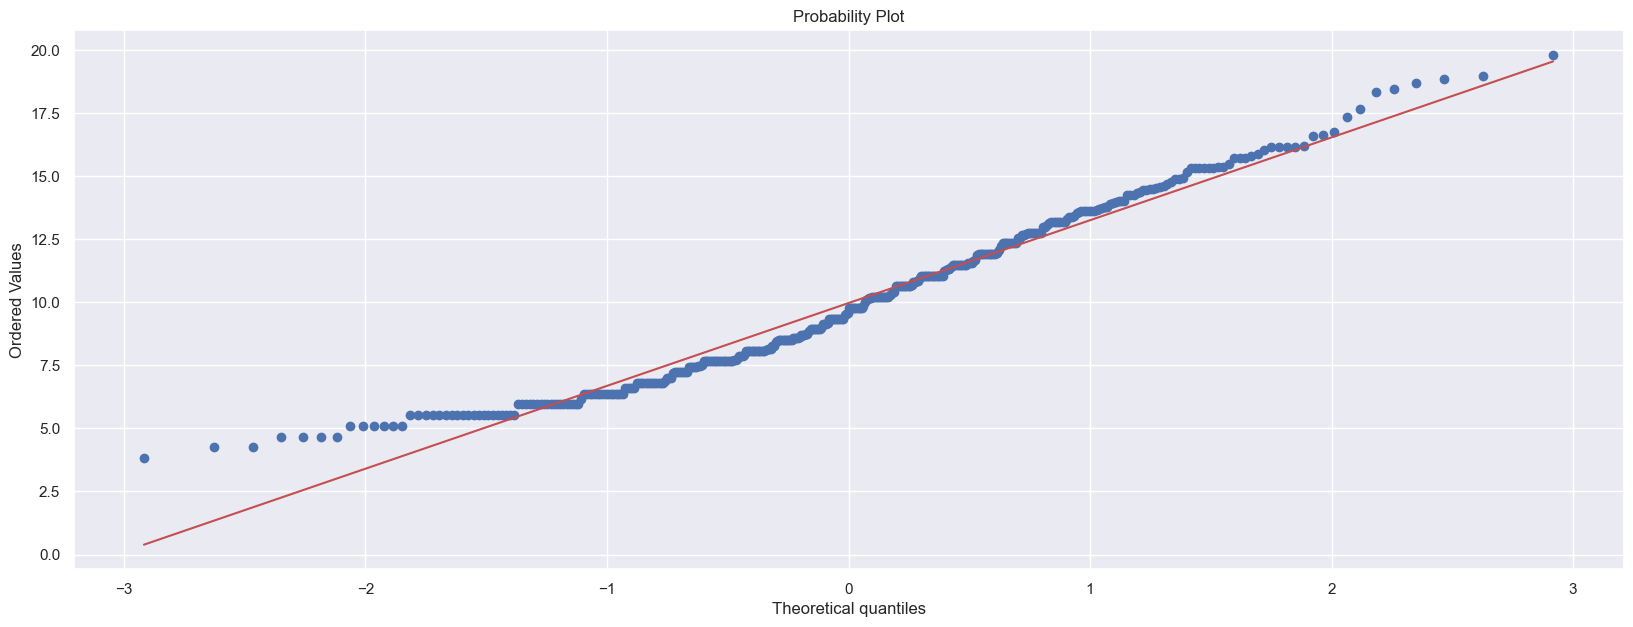

We expect that our data points will be on red line for gaussian distribution. We see dist tails


In [33]:
plt.figure(figsize=(20,7))
stats.probplot(df["Kilometer_per_liter"], plot=plt)
plt.show()
print("We expect that our data points will be on red line for gaussian distribution. We see dist tails")

In [34]:
print("Skewness: %f" % data["Kilometer_per_liter"].skew())
print("Kurtosis: %f" % data["Kilometer_per_liter"].kurt())

Skewness: 0.457092
Kurtosis: -0.515993


In [35]:
df1=df.copy(deep=True)

In [36]:
df1["log_mileage"] = np.log(df1.Kilometer_per_liter)
df1.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter,manufacturer,model,log_mileage
0,1,8,307.0,130.0,3504,12.0,1970,7.652587,chevrolet,chevellemalibu,2.035044
1,1,8,350.0,165.0,3693,11.5,1970,6.377156,buick,skylark320,1.852722
2,1,8,318.0,150.0,3436,11.0,1970,7.652587,plymouth,satellite,2.035044
3,1,8,304.0,150.0,3433,12.0,1970,6.802299,amc,rebelsst,1.917261
4,1,8,302.0,140.0,3449,10.5,1970,7.227443,ford,torino,1.977885


C:\Users\vaish\AppData\Local\Temp\ipykernel_19256\2660829158.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1.log_mileage)


<Axes: xlabel='log_mileage', ylabel='Density'>

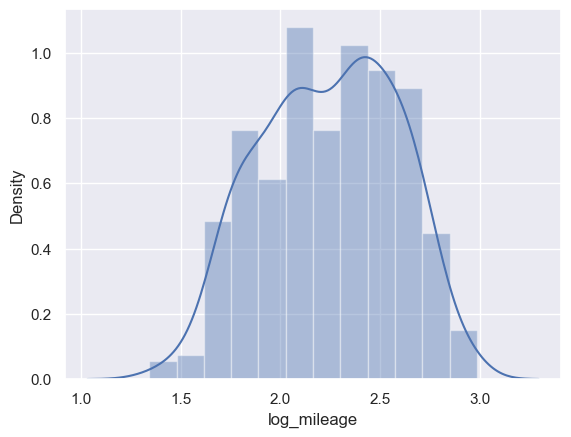

In [37]:
sns.distplot(df1.log_mileage)

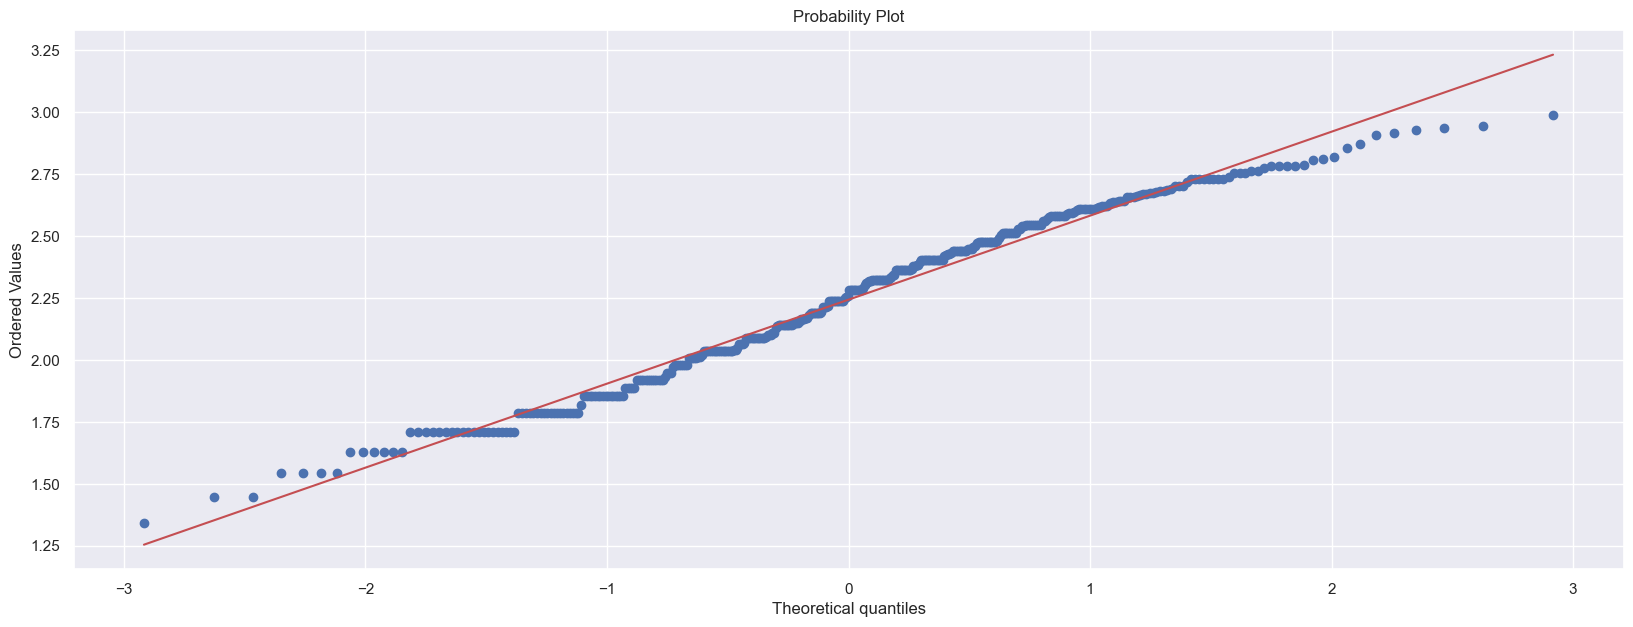

We expect that our data points will be on red line for gaussian distribution. We see dist tails


In [38]:
plt.figure(figsize=(20,7))
stats.probplot(df1["log_mileage"], plot=plt)
plt.show()
print("We expect that our data points will be on red line for gaussian distribution. We see dist tails")

In [39]:
print("Skewness: %f" % df1["log_mileage"].skew())
print("Kurtosis: %f" % df1["log_mileage"].kurt())

Skewness: -0.131382
Kurtosis: -0.817837


In [40]:
df1.displacement.describe()

count    392.000000
mean     194.411990
std      104.644004
min       68.000000
25%      105.000000
50%      151.000000
75%      275.750000
max      455.000000
Name: displacement, dtype: float64

C:\Users\vaish\AppData\Local\Temp\ipykernel_19256\3487215192.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1.displacement)


<Axes: xlabel='displacement', ylabel='Density'>

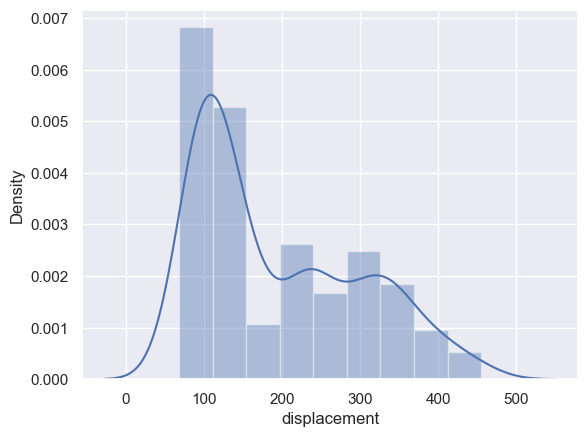

In [41]:
sns.distplot(df1.displacement)

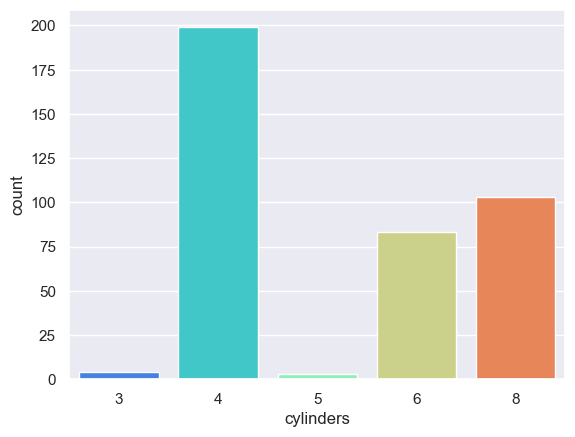

In [42]:
sns.countplot(x=df1.cylinders, palette="rainbow")
plt.show()

In [43]:
df2 = df1.copy(deep=True)

In [44]:
df2.cylinders = df2.cylinders.astype("object")

In [45]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               392 non-null    object 
 1   cylinders            392 non-null    object 
 2   displacement         392 non-null    float64
 3   horsepower           392 non-null    float64
 4   weight               392 non-null    int64  
 5   acceleration         392 non-null    float64
 6   year                 392 non-null    int64  
 7   Kilometer_per_liter  392 non-null    float64
 8   manufacturer         392 non-null    object 
 9   model                392 non-null    object 
 10  log_mileage          392 non-null    float64
dtypes: float64(5), int64(2), object(4)
memory usage: 36.8+ KB


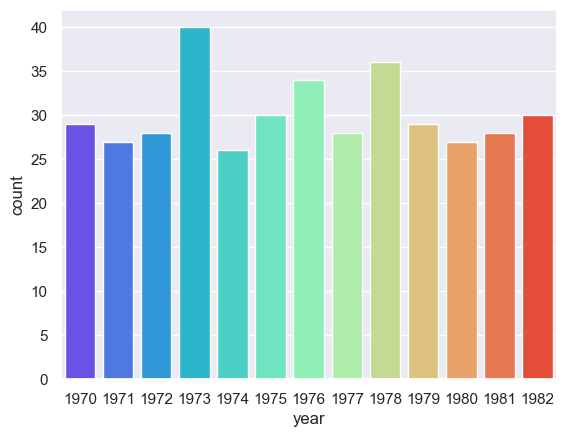

In [46]:
sns.countplot(x=df2["year"],palette="rainbow")
plt.show()

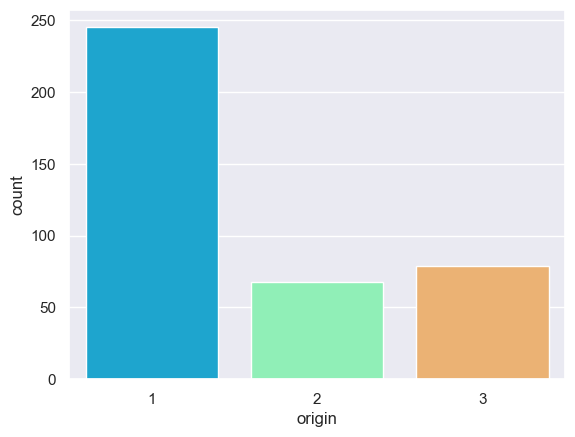

In [47]:
sns.countplot(x=df2.origin, palette="rainbow")
plt.show()

C:\Users\vaish\AppData\Local\Temp\ipykernel_19256\101471711.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2.horsepower)


<Axes: xlabel='horsepower', ylabel='Density'>

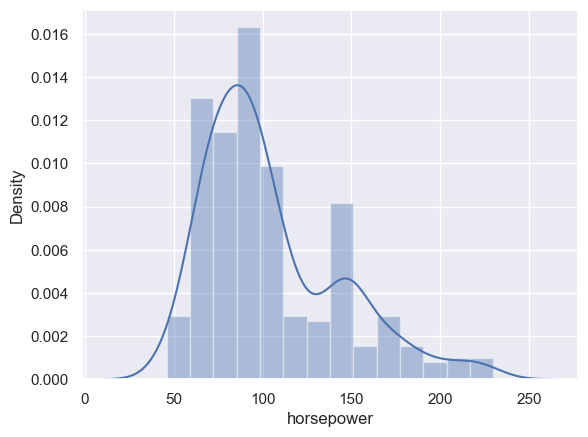

In [48]:
sns.distplot(df2.horsepower)

In [49]:
!pip install tabulate

Cars from 30 manufacturers (Top10)
----------  --
ford        48
chevrolet   47
plymouth    31
dodge       28
amc         27
toyota      26
datsun      23
volkswagen  22
buick       17
pontiac     16
----------  --


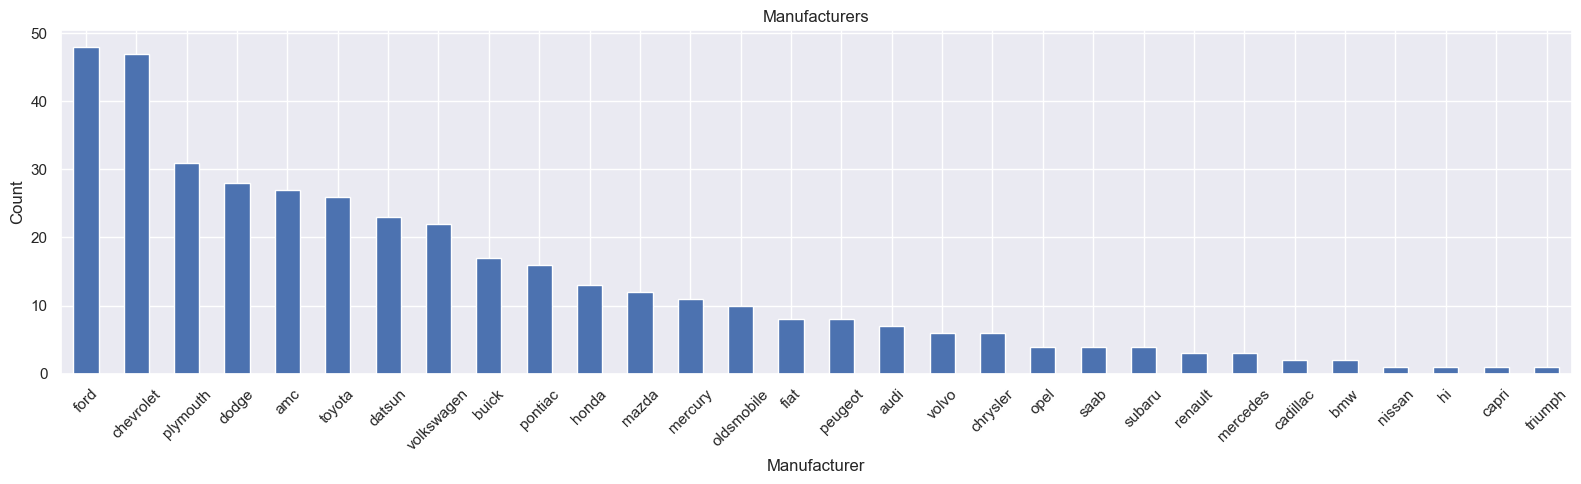

In [50]:
from tabulate import tabulate
print(f"Cars from {df2.manufacturer.nunique()} manufacturers (Top10)")
print(tabulate(pd.DataFrame(df2.manufacturer.value_counts()[:10])))

plt.figure(figsize=(16,5))
df2.groupby("manufacturer")["manufacturer"].count().sort_values(ascending=False).plot(kind="bar")
plt.title("Manufacturers")
plt.ylabel("Count")
plt.xlabel("Manufacturer")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Cars from 293 models (Top10)
--------  -
rabbit    5
pinto     5
corolla   5
matador   5
chevette  4
maverick  4
hornet    4
impala    4
corona    4
504       4
--------  -


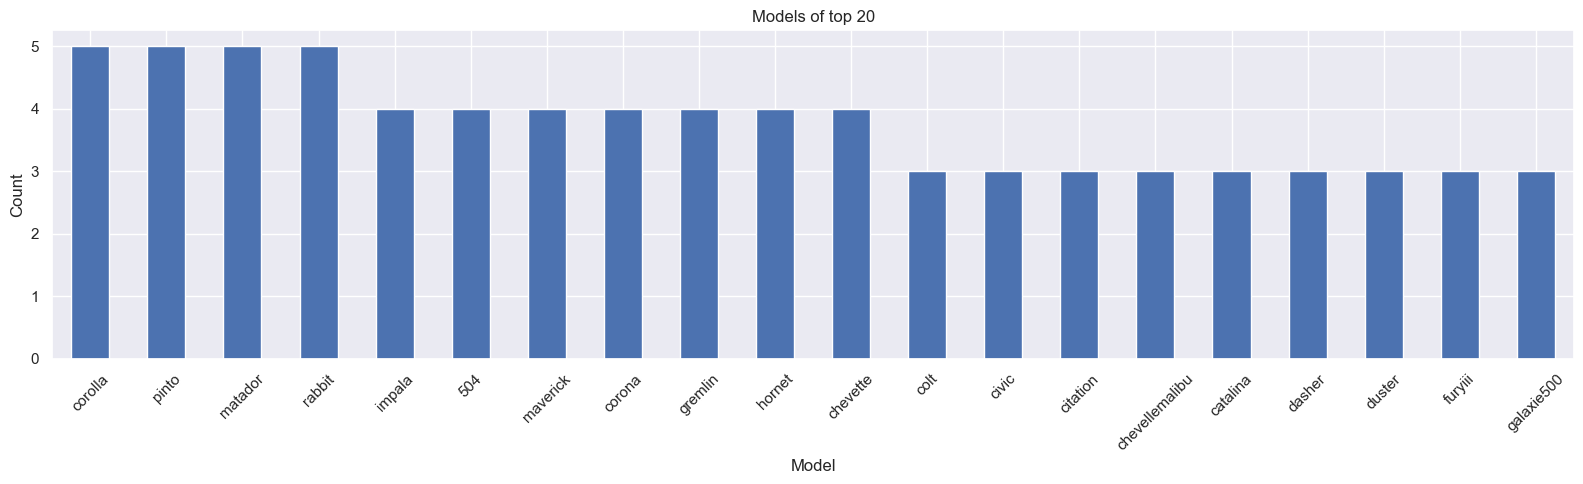

In [51]:
print(f"Cars from {df2.model.nunique()} models (Top10)")
print(tabulate(pd.DataFrame(df2.model.value_counts()[:10])))

plt.figure(figsize=(16,5))
df2.groupby("model")["model"].count().sort_values(ascending=False)[:20].plot(kind="bar")
plt.title("Models of top 20")
plt.ylabel("Count")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

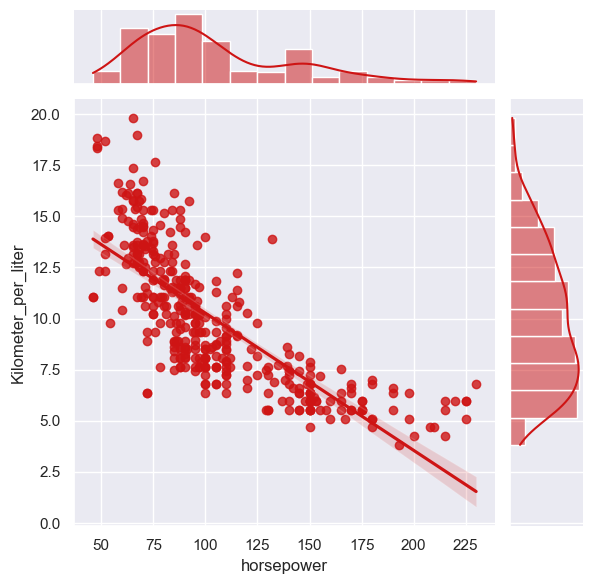

In [52]:
x=df2[["Kilometer_per_liter","horsepower"]]
sns.jointplot(x=x.loc[:,"horsepower"],y=x.loc[:,"Kilometer_per_liter"],kind="reg",color="#ce1414")

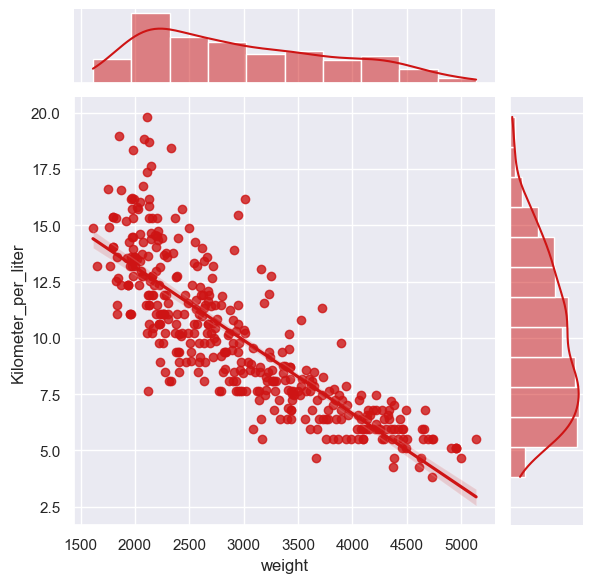

In [53]:
x = df2[["Kilometer_per_liter","weight"]]
sns.jointplot(x=x.loc[:,"weight"],y=x.loc[:,"Kilometer_per_liter"],kind="reg",color="#ce1414")

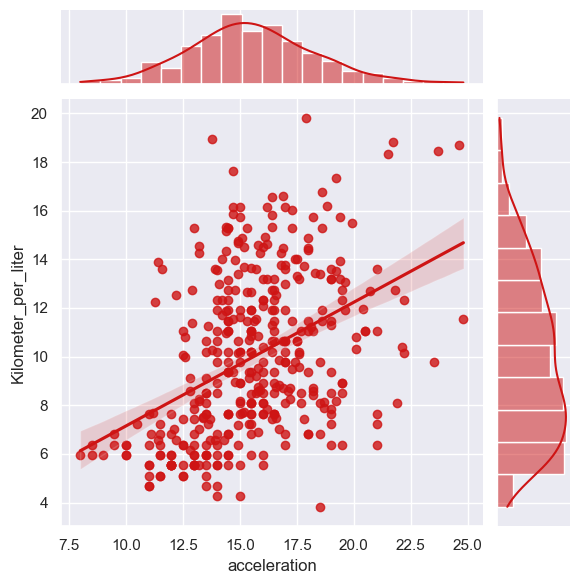

In [54]:
x = df2[["Kilometer_per_liter","acceleration"]]
sns.jointplot(x=x.loc[:,"acceleration"],y=x.loc[:,"Kilometer_per_liter"],kind="reg",color="#ce1414")

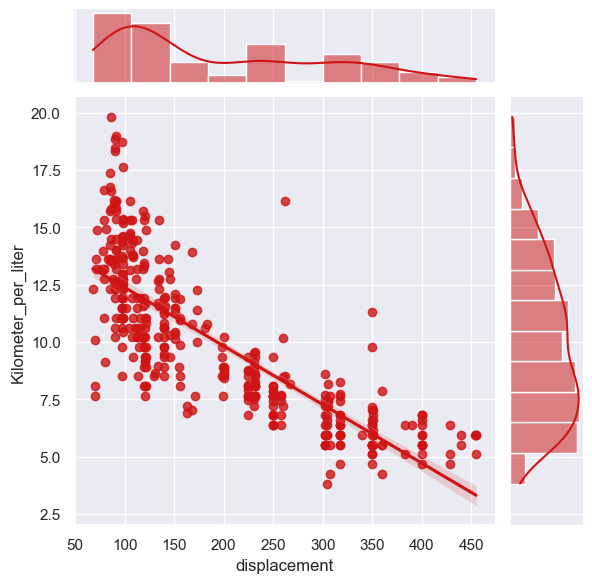

In [55]:
x = df2[["Kilometer_per_liter","displacement"]]
sns.jointplot(x=x.loc[:,"displacement"],y=x.loc[:,"Kilometer_per_liter"],kind="reg",color="#ce1414")

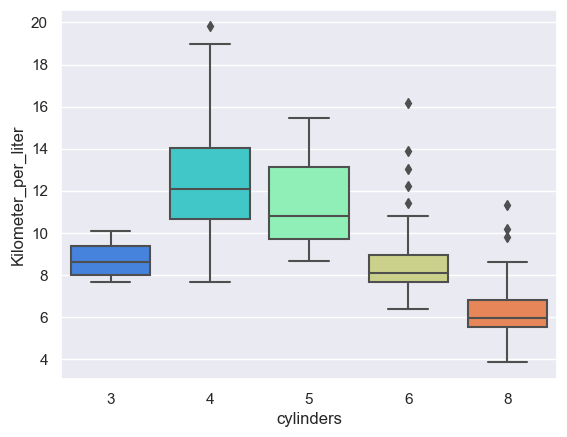

In [56]:
sns.boxplot(y="Kilometer_per_liter", x="cylinders", data=df2, palette="rainbow")
plt.show()

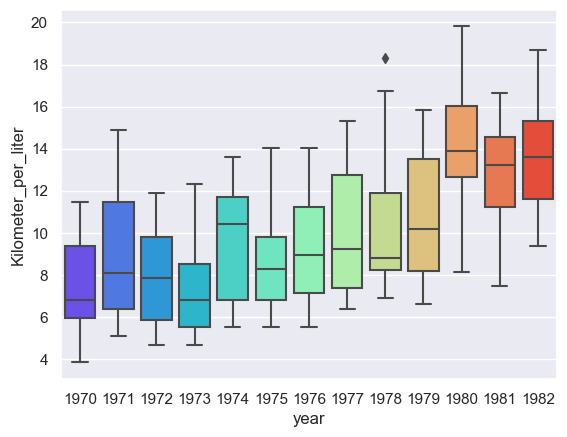

In [57]:
sns.boxplot(y="Kilometer_per_liter", x="year", data=df2, palette="rainbow")
plt.show()

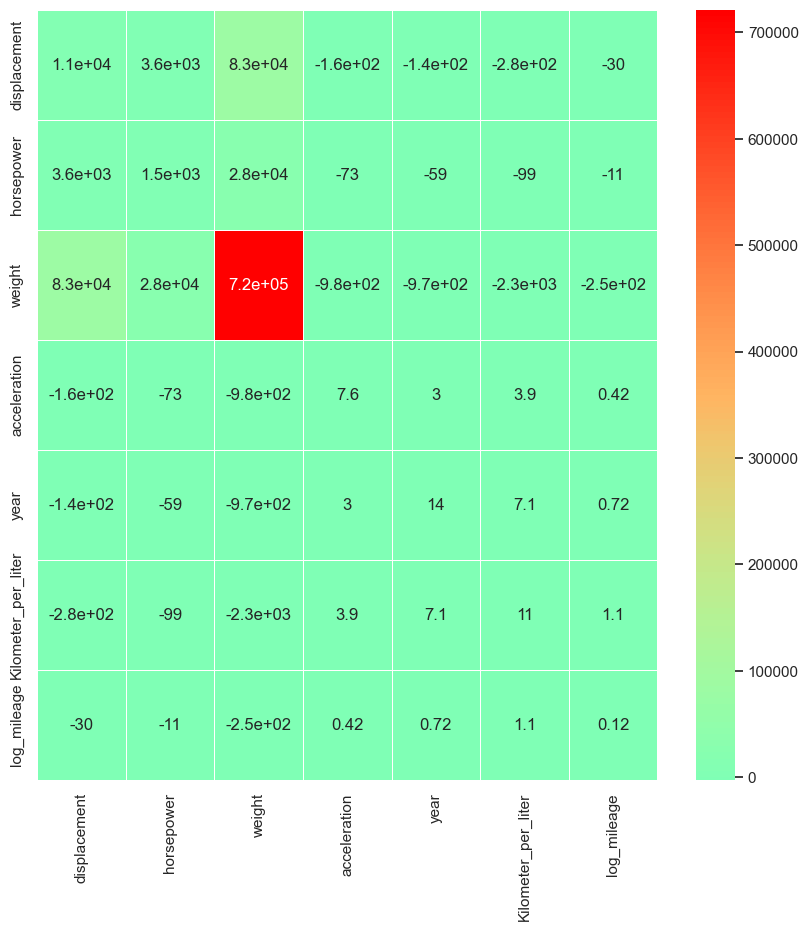

In [58]:
plt.figure(figsize=(10,10))
sns.heatmap(df2.cov(numeric_only=True),annot=True,linewidth=0.5,center=0,cmap="rainbow")
plt.show()

In [59]:
df_num=df2.drop(["Kilometer_per_liter","log_mileage","origin"],axis=1)
corr=df_num.corr(numeric_only=True)
corr

,displacement,horsepower,weight,acceleration,year
displacement,1.000000,0.897257,0.932994,-0.543800,-0.369855
horsepower,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,0.932994,0.864538,1.000000,-0.416839,-0.309120
acceleration,-0.543800,-0.689196,-0.416839,1.000000,0.290316
year,-0.369855,-0.416361,-0.309120,0.290316,1.000000


<Axes: >

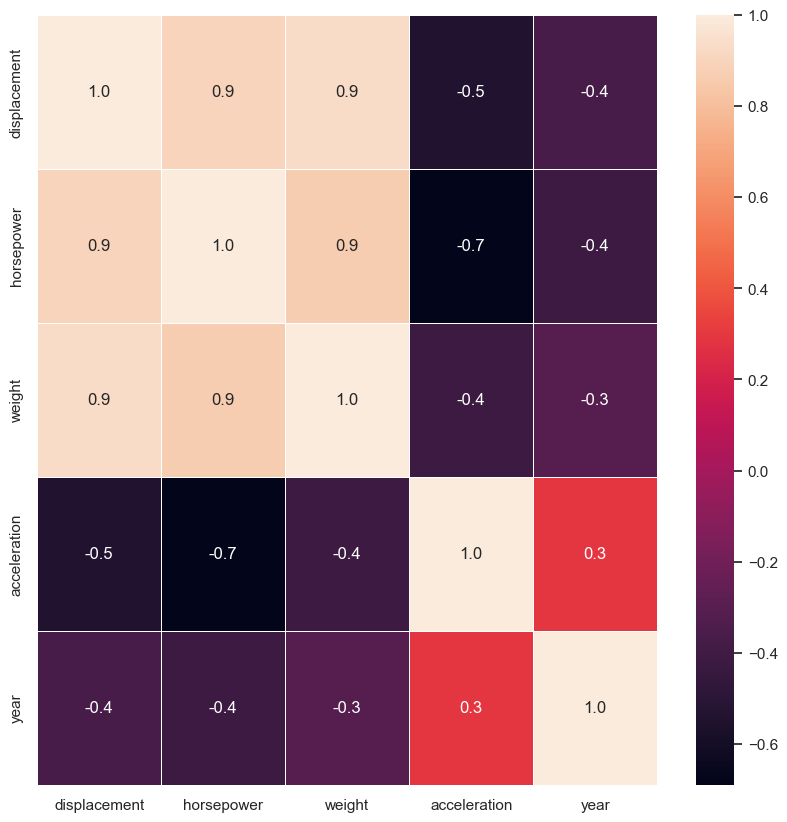

In [60]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(corr,annot=True,linewidths=0.5,fmt=".1f",ax=ax)

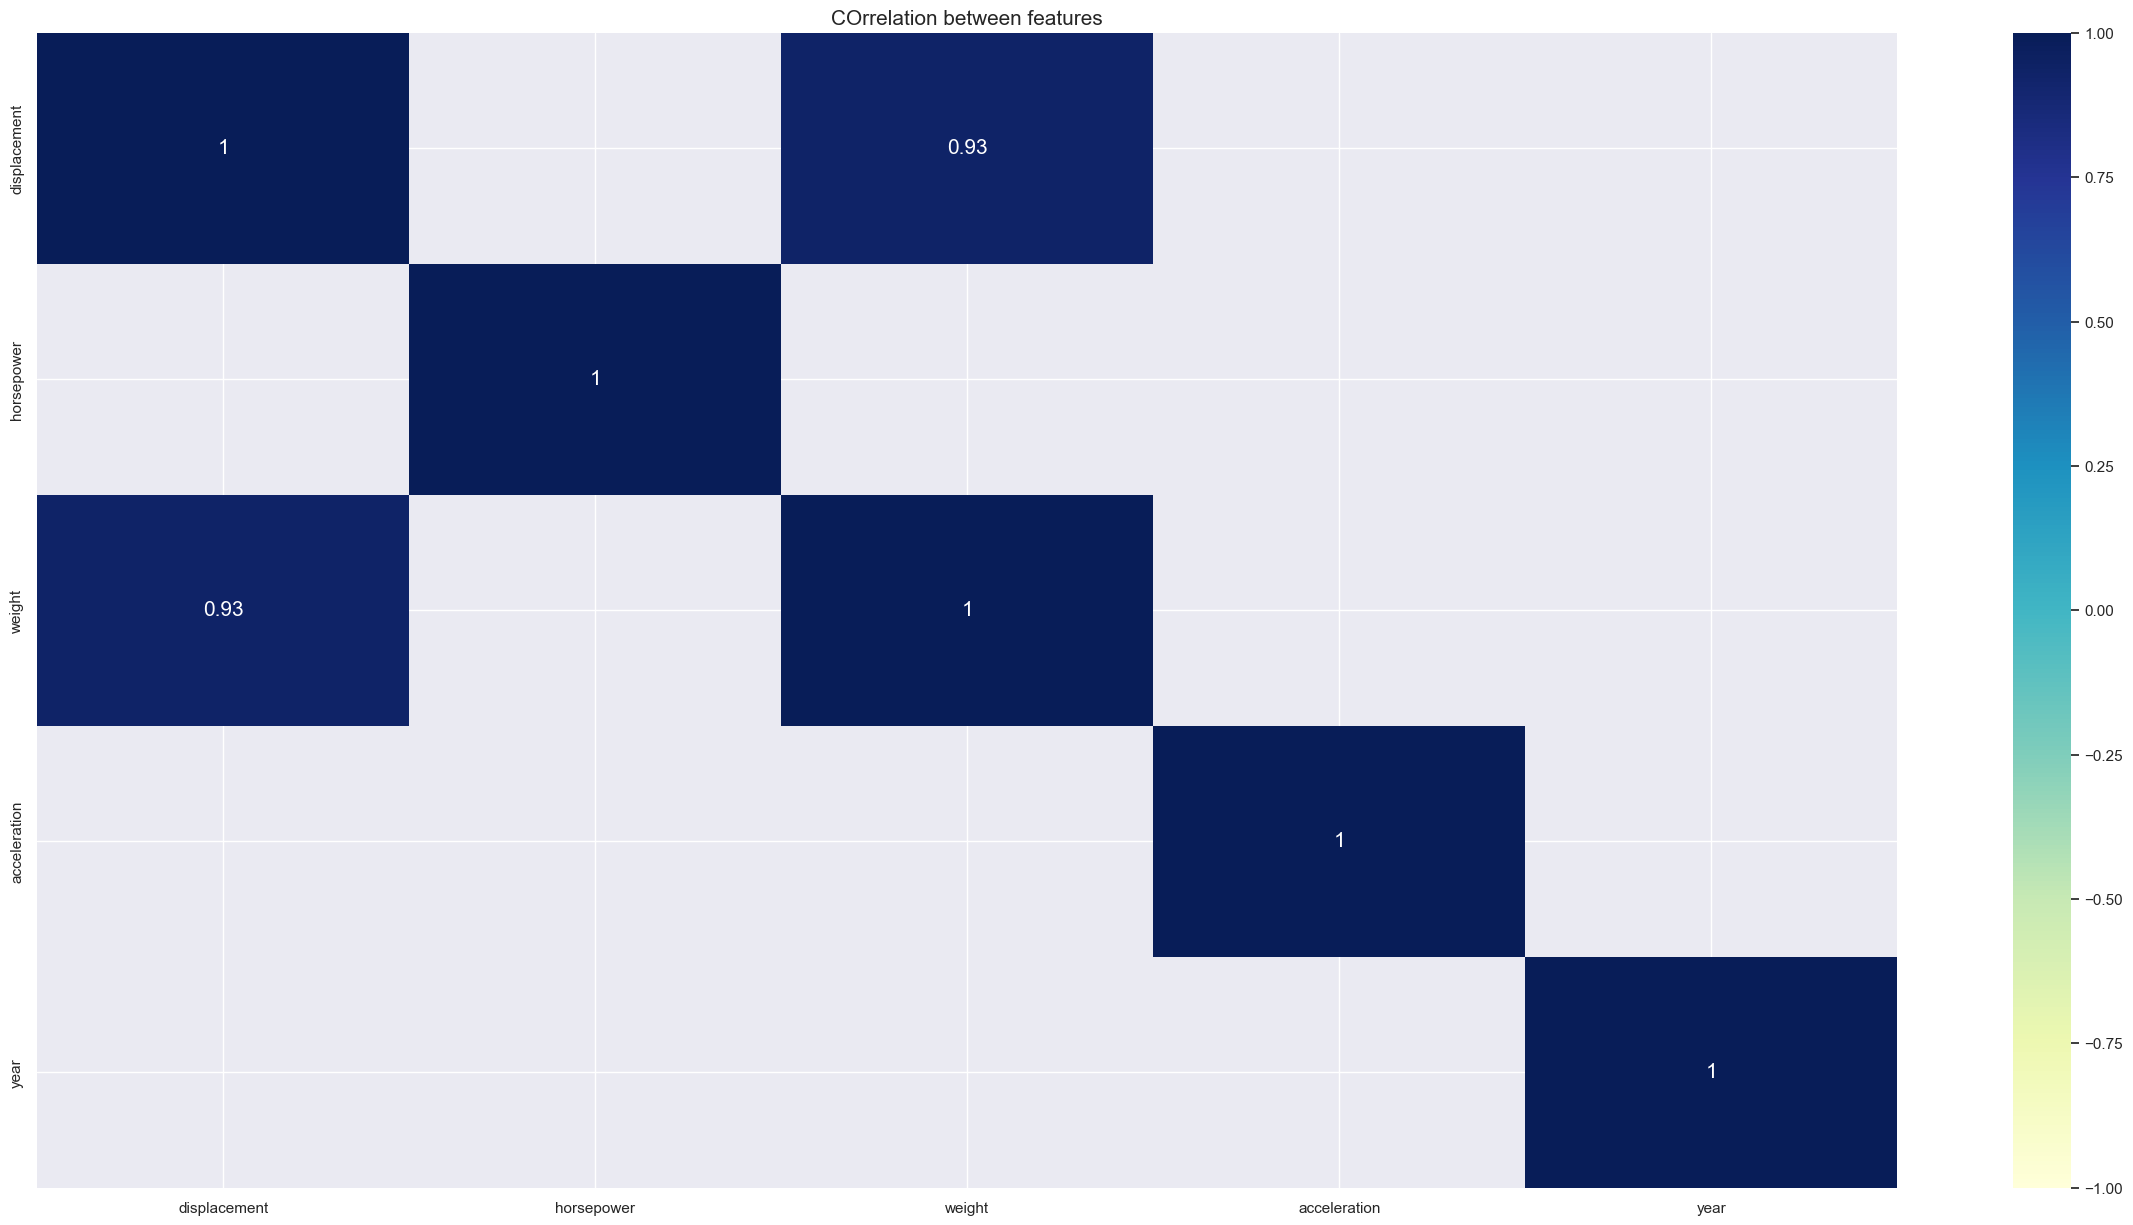

In [61]:
plt.figure(figsize=(30,15))
sns.heatmap(corr[(corr>=0.9)|(corr<=-0.9)],
           cmap="YlGnBu",vmax=1.0,vmin=-1.0,
           annot=True,annot_kws={"size":15})
plt.title("COrrelation between features", fontsize=15)
plt.show()

In [62]:
drop_list = ["weight","displacement","manufacturer","model"]
data_cleaned = df2.drop(drop_list,axis=1)
data_cleaned.head()

,origin,cylinders,horsepower,acceleration,year,Kilometer_per_liter,log_mileage
0,1,8,130.0,12.0,1970,7.652587,2.035044
1,1,8,165.0,11.5,1970,6.377156,1.852722
2,1,8,150.0,11.0,1970,7.652587,2.035044
3,1,8,150.0,12.0,1970,6.802299,1.917261
4,1,8,140.0,10.5,1970,7.227443,1.977885


In [63]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               392 non-null    object 
 1   cylinders            392 non-null    object 
 2   horsepower           392 non-null    float64
 3   acceleration         392 non-null    float64
 4   year                 392 non-null    int64  
 5   Kilometer_per_liter  392 non-null    float64
 6   log_mileage          392 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 24.5+ KB


In [64]:
data_cleaned.columns

Index(['origin', 'cylinders', 'horsepower', 'acceleration', 'year',
       'Kilometer_per_liter', 'log_mileage'],
      dtype='object')

In [65]:
data_with_dummies = pd.get_dummies(data_cleaned,drop_first=True,dtype=int)
data_with_dummies.head()

,horsepower,acceleration,year,Kilometer_per_liter,log_mileage,origin_2,origin_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8
0,130.0,12.0,1970,7.652587,2.035044,0,0,0,0,0,1
1,165.0,11.5,1970,6.377156,1.852722,0,0,0,0,0,1
2,150.0,11.0,1970,7.652587,2.035044,0,0,0,0,0,1
3,150.0,12.0,1970,6.802299,1.917261,0,0,0,0,0,1
4,140.0,10.5,1970,7.227443,1.977885,0,0,0,0,0,1


In [66]:
from sklearn.preprocessing import MinMaxScaler

In [67]:
x=data_with_dummies.drop(["Kilometer_per_liter","log_mileage"],axis=1)

In [68]:
scaler=MinMaxScaler()
scaler.fit(x)

MinMaxScaler()

In [69]:
X=scaler.fit_transform(x)
y=data_with_dummies.log_mileage

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=10)
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (313, 9)
X_test (79, 9)
y_train (313,)
y_test (79,)


## OLS

In [71]:
from sklearn.linear_model import LinearRegression

OLS_model = LinearRegression()
OLS_model.fit(X_train,y_train)

LinearRegression()

In [72]:
y_pred_OLS = OLS_model.predict(X_test)

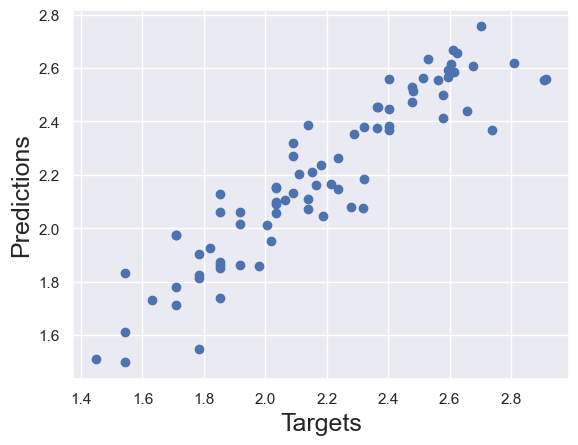

In [73]:
plt.scatter(y_test,y_pred_OLS)
plt.xlabel("Targets", size=18)
plt.ylabel("Predictions",size=18)
plt.show()

In [74]:
r_squared_OLS = OLS_model.score(X_train,y_train)
n=313
p=9
adj_r_squared_OLS = 1 - (1-r_squared_OLS)*(n-1)/(n-p-1)

from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_OLS = sqrt(mean_squared_error(y_test,y_pred_OLS))

In [75]:
cols=["Model","R-Squared","Adj R-Squared","RMSE"]
result_tabulation = pd.DataFrame(columns=cols)
OLS_metrics = pd.Series({"Model":"OLS",
                        "R-Squared":r_squared_OLS,
                        "Adj R-Squared":adj_r_squared_OLS,
                        "RMSE":rmse_OLS})
result_tabulation = result_tabulation._append(OLS_metrics,ignore_index=True)
result_tabulation

,Model,R-Squared,Adj R-Squared,RMSE
0,OLS,0.86382,0.859775,0.135834


## SGD

In [76]:
from sklearn.linear_model import SGDRegressor

SGD_model = SGDRegressor(loss="squared_error",alpha=0.1,max_iter=1000)
SGD_model.fit(X_train,y_train)

SGDRegressor(alpha=0.1)

In [77]:
y_pred_SGD = SGD_model.predict(X_test)

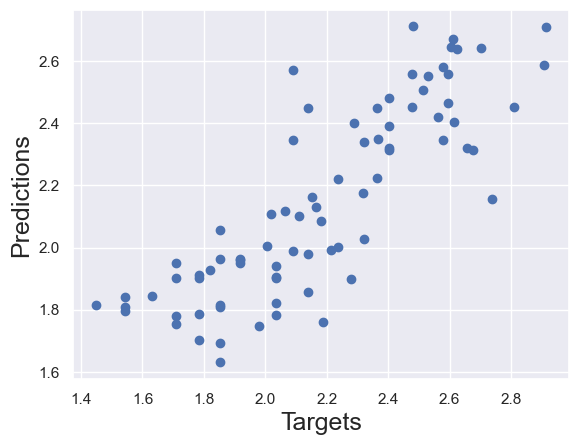

In [78]:
plt.scatter(y_test,y_pred_SGD)
plt.xlabel("Targets", size=18)
plt.ylabel("Predictions",size=18)
plt.show()

In [79]:
r_squared_SGD = SGD_model.score(X_train,y_train)
n=313
p=9
adj_r_squared_SGD = 1 - (1-r_squared_SGD)*(n-1)/(n-p-1)

from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_SGD = sqrt(mean_squared_error(y_test,y_pred_SGD))

In [80]:
SGD_metrics = pd.Series({"Model":"SGD",
                        "R-Squared":r_squared_SGD,
                        "Adj R-Squared":adj_r_squared_SGD,
                        "RMSE":rmse_SGD})
result_tabulation = result_tabulation._append(SGD_metrics,ignore_index=True)
result_tabulation

,Model,R-Squared,Adj R-Squared,RMSE
0,OLS,0.863820,0.859775,0.135834
1,SGD,0.726195,0.718062,0.198021
